# Scraping Data from a Wikipedia Table

In [1]:
import requests
from lxml import html
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("talk")
sns.set(style="white")

There's a lot of data on the Web, and we can programmatically scrape these data to explore, visualize and model.

We will show three ways to extract the world records for the men's 1500 meter race. These data are available on a Wikipedia page at the follwoing URL:

https://en.wikipedia.org/wiki/1500_metres_world_record_progression

Visit the page and scroll around to see that there are multiple tables. We want the information in only one of them.

In [2]:
url = "https://en.wikipedia.org/wiki/1500_metres_world_record_progression"

## Pandas

We can read html documents with Pandas' `read_html()`, which returns a list of tables found in the document. This can be handy when the data we want are in a table. 

In [3]:
tables = pd.read_html(url)

In [4]:
len(tables)

6

Pandas has found six tables, and created six data frames for us. We examine the first fiew rows of each table to figure out which one we want.

In [5]:
for t in tables:
    display(t.head())

,Time,Athlete,Date,Place
0,4:24+3/5,J. Borel (FRA),1892,NaN
1,4:21,Fernand Meiers (FRA),1893-05-28,"Paris, France"
2,4:19+4/5,Felix Bourdier (FRA),1894-07-22,"Paris, France"
3,4:18+2/5,Albin Lermusiaux (FRA),1895-05-12,"Paris, France"
4,4:16+4/5,Michel Soalhat (FRA),1895-05-26,"Paris, France"


,Time,Auto,Athlete,Date,Place
0,3:55.8,NaN,Abel Kiviat (USA),1912-06-08,"Cambridge, Massachusetts, United States"
1,3:54.7,NaN,John Zander (SWE),1917-08-05,"Stockholm, Sweden"
2,3:52.6,NaN,Paavo Nurmi (FIN),1924-06-19,"Helsinki, Finland"
3,3:51.0,NaN,Otto Peltzer (GER),1926-09-11,"Berlin, Germany"
4,3:49.2,NaN,Jules Ladoumegue (FRA),1930-10-05,"Paris, France"


,Time,Athlete,Date,Place
0,5:18.2,Anna Mushkina (URS),1927-08-19,"Moscow, Soviet Union"
1,5:07.0,Anna Mushkina (URS),1934-09-16,"Alma-Ata, Soviet Union"
2,5:02.0,Lydia Freiberg (URS),1936-07-13,"Moscow, Soviet Union"
3,4:47.2,Yevdokiya Vasilyeva (URS),1936-07-30,"Moscow, Soviet Union"
4,4:45.2,Yevdokiya Vasilyeva (URS),1937-09-13,"Moscow, Soviet Union"


,Time,Auto,Athlete,Date,Place
0,4:17.3+,NaN,Anne Smith (GBR),1967-06-03,"Chiswick, Great Britain"
1,4:15.6,NaN,Maria Gommers (NED),1967-10-24,"Sittard, Netherlands"
2,4:12.4,NaN,Paola Pigni (ITA),1969-07-02,"Milan, Italy"
3,4:10.7,4:10.77,Jaroslava Jehličková (CZE),1969-09-20,"Athens, Greece"
4,4:09.6,4:09.62,Karin Burneleit (GDR),1971-08-15,"Helsinki, Finland"


,vteAthletics record progressions,vteAthletics record progressions.1
0,World,Running 60 metres men women 100 metres men wom...
1,Running,60 metres men women 100 metres men women 200 m...
2,Walking,10 km men women 20 km men women 50 km men women
3,Jumping,High jump men outdoor men indoor women Long ju...
4,Throwing,Shot put men women Discus men women Hammer men...


,0,1
0,Running,60 metres men women 100 metres men women 200 m...
1,Walking,10 km men women 20 km men women 50 km men women
2,Jumping,High jump men outdoor men indoor women Long ju...
3,Throwing,Shot put men women Discus men women Hammer men...
4,Combined events,Decathlon Heptathlon men women Pentathlon


We see that it's the second table that we want.
Let's look at more of the records, and examine their values more closely.

In [6]:
tables[1].head(20)

,Time,Auto,Athlete,Date,Place
0,3:55.8,NaN,Abel Kiviat (USA),1912-06-08,"Cambridge, Massachusetts, United States"
1,3:54.7,NaN,John Zander (SWE),1917-08-05,"Stockholm, Sweden"
2,3:52.6,NaN,Paavo Nurmi (FIN),1924-06-19,"Helsinki, Finland"
3,3:51.0,NaN,Otto Peltzer (GER),1926-09-11,"Berlin, Germany"
4,3:49.2,NaN,Jules Ladoumegue (FRA),1930-10-05,"Paris, France"
5,3:49.2,NaN,Luigi Beccali (ITA),1933-09-09,"Turin, Italy"
6,3:49.0,NaN,Luigi Beccali (ITA),1933-09-17,"Milan, Italy"
7,3:48.8,NaN,Bill Bonthron (USA),1934-06-30,"Milwaukee, United States"
8,3:47.8,NaN,Jack Lovelock (NZL),1936-08-06,"Berlin, Germany"
9,3:47.6,NaN,Gunder Hägg (SWE),1941-08-10,"Stockholm, Sweden"


The variables are strings that we will need to clean and transform. Specifically, 
 
+ Run times:
    + we will want to convert these strings from min:sec to either seconds or minutes, e.g. convert '3:55.8' to  180+55.8 = 235.8 seconds  
    + A few of the rows have +-signs in the race time fields
+ Date: we will want to transform to a date type so that we can visualize the programm in time

We hold off on cleaning and transforming these variables until after we show two other approaches to acquire these data. 

## HTTP 

Before we introduce Beautiful Soup and XPath, we first examine the HTTP request to retrieve the page. 

We use the 'requests' library. HTTP has a GET and PUT method. To retrieve a Web page, we use GET. In another notebook, we use PUT to retrieve data using a Web form.

In [7]:
resp = requests.get(url)

In [8]:
type(resp)

requests.models.Response

In [9]:
resp.request.method

'GET'

We examine the:

+ status of our request 
+ header for our request
+ header for the response to our request
+ content of the response (the web page)

In [10]:
resp.status_code

200

In [11]:
dict(resp.request.headers)

{'User-Agent': 'python-requests/2.22.0',
 'Accept-Encoding': 'gzip, deflate',
 'Accept': '*/*',
 'Connection': 'keep-alive'}

In [12]:
dict(resp.headers)

{'Date': 'Sat, 16 Nov 2019 22:12:06 GMT',
 'Vary': 'Accept-Encoding,Cookie,Authorization',
 'Server': 'ATS/8.0.5',
 'X-ATS-Timestamp': '1573942326',
 'Content-Type': 'text/html; charset=UTF-8',
 'X-Powered-By': 'PHP/7.2.22-1+0~20190902.26+debian9~1.gbpd64eb7+wmf1',
 'X-Content-Type-Options': 'nosniff',
 'P3P': 'CP="See https://en.wikipedia.org/wiki/Special:CentralAutoLogin/P3P for more info."',
 'Content-language': 'en',
 'Last-Modified': 'Tue, 12 Nov 2019 05:43:43 GMT',
 'Backend-Timing': 'D=125006 t=1573590915596246',
 'Content-Encoding': 'gzip',
 'X-Varnish': '970484137 979023273',
 'Age': '0',
 'X-Cache': 'cp4030 miss, cp4031 hit/1',
 'X-Cache-Status': 'hit-front',
 'Server-Timing': 'cache;desc="hit-front"',
 'Strict-Transport-Security': 'max-age=106384710; includeSubDomains; preload',
 'Set-Cookie': 'WMF-Last-Access=16-Nov-2019;Path=/;HttpOnly;secure;Expires=Wed, 18 Dec 2019 12:00:00 GMT, WMF-Last-Access-Global=16-Nov-2019;Path=/;Domain=.wikipedia.org;HttpOnly;secure;Expires=Wed, 

In [13]:
resp.content[:1000]

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>1500 metres world record progression - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XcsXgwpAMEsAAHVxav4AAACM","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"1500_metres_world_record_progression","wgTitle":"1500 metres world record progression","wgCurRevisionId":914710775,"wgRevisionId":914710775,"wgArticleId":14824822,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["World a

Now that we have the page, we need to extract the data from it. We will use Beautiful Soup and then XPath to do this.

## Beautiful Soup

Beautiful Soup parses the HTML document and creates a BeautifulSoup object, which represents the document as a nested data structure (a tree).  Beautiful Soup provides functionality to search for elements in the tree.
The most useful ones are `find()` and `find_all()`. We can also travel up and down the tree by specifying tag names (e.g., `table`) and `parent` and `children` and `text`.

First we parse the document in `resp.content`.

In [14]:
soup = BeautifulSoup(resp.content, "html.parser")

We can follow the Pandas example, and use `find_all()` to retrieve all 'table' nodes. We get six of them as expected.

In [15]:
tableSoup = soup.find_all('table')

In [16]:
len(tableSoup)

6

From our earlier work, we know that the table of interest is the second one. We locate all of the rows in this table, i.e., all of the 'tr' nodes in the second table with another call to `find_all()`

In [17]:
rowSoup = tableSoup[1].find_all('tr')

In [18]:
rowSoup[:3]

[<tr>
 <th>Time</th>
 <th>Auto</th>
 <th>Athlete</th>
 <th>Date</th>
 <th>Place
 </th></tr>, <tr>
 <td><b>3:55.8</b>
 </td>
 <td>
 </td>
 <td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/> </span><a href="/wiki/Abel_Kiviat" title="Abel Kiviat">Abel Kiviat</a> <span style="font-size:90%;">(<abbr title="United States">USA</abbr>)</span>
 </td>
 <td>1912-06-08
 </td>
 <td><a href="/wiki/Cambridge,_Massachusetts" title="Cambridge, Massachusetts">Cambridge, Massachusetts</a>, United States
 </td></tr>, <tr>
 <td><b>3:5

The first row is a header and then there are the data rows. From each row, we can extract the time from the first 'td' node in each row, the date from the fourth, and the name from the title attribute in the 'a' element of the third 'td' node.

We explore the BeautifulSoup expression to do this with the second row in the table.

In [19]:
rowAbel = rowSoup[1]
rowAbel

<tr>
<td><b>3:55.8</b>
</td>
<td>
</td>
<td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/> </span><a href="/wiki/Abel_Kiviat" title="Abel Kiviat">Abel Kiviat</a> <span style="font-size:90%;">(<abbr title="United States">USA</abbr>)</span>
</td>
<td>1912-06-08
</td>
<td><a href="/wiki/Cambridge,_Massachusetts" title="Cambridge, Massachusetts">Cambridge, Massachusetts</a>, United States
</td></tr>

In [20]:
rowAbel.find_all('td')[0].text

'3:55.8\n'

We have retrieved the text content of the first 'td' element in the second row.


Next we retrieve the name of the runner. Rather than retrieve it from the text content, we noticed that the name also appears in the 'title' attribute of the 'a' node in the third 'td' in the row. We show how to retrieve the name from this part of the table. 

In [21]:
rowAbel.find_all('td')[2].a['title']

'Abel Kiviat'

Notice that 'a['title'] retrieves the value of the 'title' attribute of the 'a' tag.


Lastly, we get the date with

In [22]:
rowAbel.find_all('td')[3].text

'1912-06-08\n'

We now retrieve these three values for all of the world record rows in the table.

In [23]:
namesSoup = []
datesSoup = []
timesSoup = []
for r in rowSoup[1:]:
    tds = r.find_all('td')
    timesSoup.append(tds[0].text)
    namesSoup.append(tds[2].a['title'])
    datesSoup.append(tds[3].text)

In [24]:
namesSoup[:3]

['Abel Kiviat', 'John Zander', 'Paavo Nurmi']

In [25]:
timesSoup[12:18]

['3:43.0\n', '3:43.0\n', '3:43.0\n', '3:42.8+\n', '3:41.8+\n', '3:40.8\n']

In [26]:
datesSoup[12:18]

['1944-07-07\n',
 '1947-07-15\n',
 '1952-06-29\n',
 '1954-06-04\n',
 '1954-06-21\n',
 '1955-07-28\n']

We need to clean these up too, but we will do that after looking at XPath.

Below is another way to retrieve the desired rows from our table that combines the two steps from above. That is, we:

+ find all tables, 
+ select the second table,
+ find all rows in that table, and
+ drop the first row (it holds the table header).

In [27]:
rowsAlt = soup.find_all('table')[1].find_all('tr')[1:]
rowsAlt[:2]

[<tr>
 <td><b>3:55.8</b>
 </td>
 <td>
 </td>
 <td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/> </span><a href="/wiki/Abel_Kiviat" title="Abel Kiviat">Abel Kiviat</a> <span style="font-size:90%;">(<abbr title="United States">USA</abbr>)</span>
 </td>
 <td>1912-06-08
 </td>
 <td><a href="/wiki/Cambridge,_Massachusetts" title="Cambridge, Massachusetts">Cambridge, Massachusetts</a>, United States
 </td></tr>, <tr>
 <td><b>3:54.7</b>
 </td>
 <td>
 </td>
 <td align="left"><span class="flagicon"><img alt="" class="thum

## XPath

XPath is a language designed for locating content in XML and HTML documents. The syntax is similar to path names for files in Unix, but with a few important differences:

+ Multiple nodes in a document can be located with one expression
+ Nodes can be filtered 

The core concept to an XPath expression is the location step. A location step consists of three pieces:

+ axis: direction to look (down one level to children, up one level to parent, self, etc.)
+ node test: typically the name of a node
+ predicate: a condition that the nodes must satisfy (this is an optional piece)

The syntax is: axis/nodetext[predicate]  (It's a bit more comples than that, but we will keep to this simple approach).

We string location steps together, separated by /s, to form a location path.

We introduce only a few of the most common axes. These have short cuts to describe them:

+ child is the default and can be dropped 
+ down the tree from current node: // 
+ self: . 
+ parent: ..
+ root: /

We provide examples of location paths in our search for content in the Wikipedia page.

XPath is provided as part of the 'lxml' library.
We use it to parse the page contents into a tree with:

In [28]:
dom = html.document_fromstring(resp.content) 

Like with Beautiful Soup, we can traverse the DOM (Document Object Model), i.e., the tree with  'find()' and 'getchildren()'. However, we will focus on using XPath expressions.

In [29]:
dom.getchildren()

[<Element head at 0x1a1dacaf50>, <Element body at 0x1a1dacaad0>]

In [30]:
body = dom.find("body")

In [31]:
body.getchildren()

[<Element div at 0x1a1dae0470>,
 <Element div at 0x1a1dae0230>,
 <Element div at 0x1a1dae04d0>,
 <Element div at 0x1a1dae0530>,
 <Element div at 0x1a1dae0590>,
 <Element div at 0x1a1dae05f0>,
 <Element script at 0x1a1dae0650>,
 <Element script at 0x1a1dae06b0>,
 <Element script at 0x1a1dae0710>]

We provide three ways to access the table and the contents of interest.

### Locate the Second Table

We know that the table we want is the second table in the document. From the top of the document we search anywhere below for a 'table' node and the filter the resulting node set by selecting the second one.

We do this with the following simple XPath expression: "//table[2]"
Notice that:

+ the axis "//" stands for all nodes down from the root of the tree
+ the nodetest is 'table', which means the tag-name is table
+ the predicate filters the set of table nodes to the second one found.


In [32]:
table1 = dom.xpath("//table[2]")
print(html.tostring(table1[0], pretty_print=True).decode('UTF8')[:500])

<table class="wikitable sortable" style="font-size:95%; text-align:center;">
<tbody>
<tr>
<th>Time</th>
<th>Auto</th>
<th>Athlete</th>
<th>Date</th>
<th>Place
</th>
</tr>
<tr>
<td>
<b>3:55.8</b>
</td>
<td>
</td>
<td align="left">
<span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" decoding="async" width="23" height="12" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a


### Filter on the Table Contents

Rather than rely on the position of the table in the document, we can use the contents of the table to select the correct table. Specifically, we know that the table contains a row with a link that has a title attribute of "John Zander".

The following XPath expressions will retrieve this table.

'//table[.//a/@title="John Zander"]' 

This expression again contains only one location step. The parts of the step are:

+ axis: "//" meaning any descendant (or self)
+ nodetest: table meaning any node with tag name "table"
+ predicate: from the table (i.e., axis ".") any descendant (i.e., "//") with nodetest "a"  having a 'title' attribute. The condition is that this attribute must have the value "John Zander".

In [33]:
table2 = dom.xpath('//table[.//a/@title="John Zander"]')
print(html.tostring(table2[0], pretty_print=True).decode('UTF8')[:500])

<table class="wikitable sortable" style="font-size:95%; text-align:center;">
<tbody>
<tr>
<th>Time</th>
<th>Auto</th>
<th>Athlete</th>
<th>Date</th>
<th>Place
</th>
</tr>
<tr>
<td>
<b>3:55.8</b>
</td>
<td>
</td>
<td align="left">
<span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" decoding="async" width="23" height="12" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a


The following XPath expression is very similar. The difference is that the path within the predicate is completely specified.  That is the predicate starts from the table and says:  
+ go to the child 'tbody' then 
+ to the child(ren) 'tr' then 
+ to child(ren) 'td' then 
+ to child(ren) 'a' and finally 
+ to the attribute of 'a' called title.


In [34]:
table2A = dom.xpath('//table[./tbody/tr/td/a/@title="John Zander"]')
print(html.tostring(table2A[0], pretty_print=True).decode('UTF8')[:500])

<table class="wikitable sortable" style="font-size:95%; text-align:center;">
<tbody>
<tr>
<th>Time</th>
<th>Auto</th>
<th>Athlete</th>
<th>Date</th>
<th>Place
</th>
</tr>
<tr>
<td>
<b>3:55.8</b>
</td>
<td>
</td>
<td align="left">
<span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" decoding="async" width="23" height="12" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a


## Use the structure of the table

Again, we know that John Zander is in the table, and we can precisely state where to find this text content with an XPath expression. To do this we travel down the table descendants to locate the 'a' tag with the 'title' attribute and then reverse back up to the table node.

'//table/tbody/tr/td/a[@title="John Zander"]/../../../..'  

Here we have a long location path and one location step has a predicate. The location steps are as follows:

+ go to any table anywhere in the document 
+ go to the child 'tbody' then 
+ to the child(ren) 'tr' then 
+ to child(ren) 'td' then 
+ to child(ren) 'a' and select only those with a title attribute value of "John Zander" and then 
+ go to 'a's parent then
+ go to 'a's grandparent then  
+ go to 'a's great-grandparent then
+ go to 'a's great-great-grandparent (which is the 'table' node)

We know that only one table will have John Zander in it's 'a' node, and from this 'a' node, we travel back up the tree, one step at a time to the 'table' ancestor.  

In [35]:
table3 = dom.xpath('//table/tbody/tr/td/a[@title="John Zander"]/../../../..')
print(html.tostring(table3[0], pretty_print=True).decode('UTF8')[:500])

<table class="wikitable sortable" style="font-size:95%; text-align:center;">
<tbody>
<tr>
<th>Time</th>
<th>Auto</th>
<th>Athlete</th>
<th>Date</th>
<th>Place
</th>
</tr>
<tr>
<td>
<b>3:55.8</b>
</td>
<td>
</td>
<td align="left">
<span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" decoding="async" width="23" height="12" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a


### Extract the data from the table

No matter which approach we take, we can now access the text content in the desired columns of the table. We again use XPath expressions to do this. Note that

+ text() returns the text content of a node
+ a/@title returns the value for the title attribute in the a node


In [36]:
datesDom = table1[0].xpath('.//tr/td[4]/text()')
datesDom[:3]

['1912-06-08\n', '1917-08-05\n', '1924-06-19\n']

In [37]:
timesDom = table1[0].xpath('.//tr/td[1]/b/text()')
timesDom[14:18]

['3:43.0', '3:42.8+', '3:41.8+', '3:40.8']

In [38]:
namesDom = table1[0].xpath('.//tr/td[3]/a/@title')
namesDom[:4]

['Abel Kiviat', 'John Zander', 'Paavo Nurmi', 'Otto Peltzer']

## Clean and Transform

Whether we use Pandas 'read_html()' or Beautiful Soup or XPath, we have acquired the data, but they are not ready to be visualized. As mentioned above the data are strings that we need to clean and transform.
 
+ Run times:
    + convert from "min:sec" to either numeric seconds, e.g. convert "3:55.8" to  180+55.8 = 235.8 seconds  
    + Remove any +-signs before the conversion
+ Dates: transform to a date type so we can visualize the progress in time

We use the data acquired from the XPath approach, but the same cleaning and transformations will work for the other two approaches.

In [39]:
df = pd.DataFrame({'name': namesDom, 'time': timesDom,'date': datesDom})

In [40]:
df["time"] = df["time"].str.replace("+", "")
time_pieces = df["time"].str.split(r':')
df['runTime'] = time_pieces.str[0].astype(float) * 60 +  time_pieces.str[1].astype(float)

In [41]:
df['newDate'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [42]:
df.head()

,name,time,date,runTime,newDate
0,Abel Kiviat,3:55.8,1912-06-08\n,235.8,1912-06-08
1,John Zander,3:54.7,1917-08-05\n,234.7,1917-08-05
2,Paavo Nurmi,3:52.6,1924-06-19\n,232.6,1924-06-19
3,Otto Peltzer,3:51.0,1926-09-11\n,231.0,1926-09-11
4,Jules Ladoumegue,3:49.2,1930-10-05\n,229.2,1930-10-05


## Plot the Progression in World Record 

Now that our data are cleaned and transformed, we can make a step-plot to see when world records were broken and for how long a record stood. 

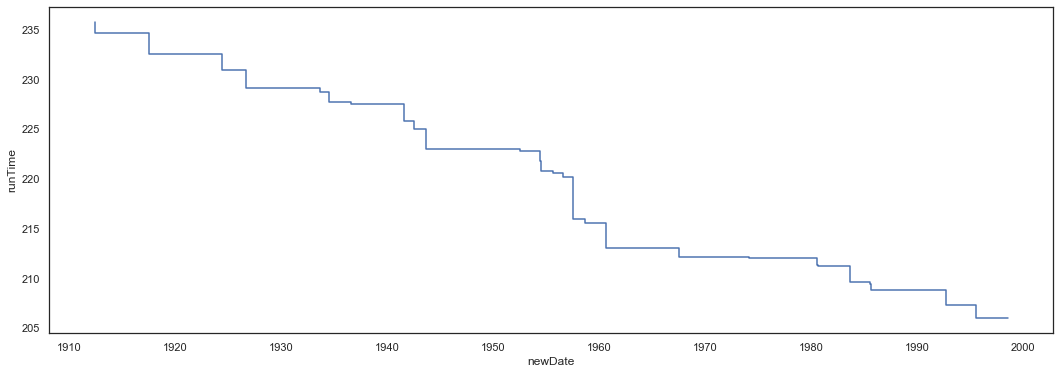

In [43]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(18,6))
axs = sns.lineplot(y=df['runTime'], x=df['newDate'], drawstyle='steps-pre')
#axs.figure.savefig("worldRecords.png", dpi=300, bbox_inches = "tight")